In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import json

from collections import Counter 

In [97]:
with open('flujograma_carreras.json', encoding="utf8") as json_file: 
    data = json.load(json_file)

careers = {key:value for key, value in data.items() if key == 'CIENCIAS ADMINISTRATIVAS-G' or key == 'ECONOMÍA EMPRESARIAL' or
           key == 'CONTADURÍA PÚBLICA' or key == 'CIENCIAS ADMINISTRATIVAS-B'}

#careers = {key:value for key, value in data.items() if key == 'EDUCACIÓN' or key == 'PSICOLOGÍA' or
#           key == 'IDIOMAS MODERNOS' or key == 'MATEMÁTICAS INDUSTRIALES-S' or key == 'MATEMÁTICAS INDUSTRIALES-E'}

#careers = {key:value for key, value in data.items() if key == 'DERECHO' or key == 'ESTUDIOS LIBERALES'}

#careers = {key:value for key, value in data.items() if key == 'INGENIERÍA CIVIL' or key == 'INGENIERÍA DE SISTEMAS' or
#           key == 'INGENIERÍA DE PRODUCCIÓN' or key == 'INGENIERÍA QUÍMICA' or key == 'INGENIERÍA ELÉTRICA' or
#           key == 'INGENIERÍA MECÁNICA'}

assigns = set()
for key, value in careers.items():
    for k, v in value.items():
        assigns.add(k)

In [98]:
len(assigns)

111

In [99]:
df = pd.read_csv('clean_data.csv')        

#df = df[(df['Plan de Estudios'] == 'DERECHO') | (df['Plan de Estudios'] == 'EDUCACIÓN') |
#        (df['Plan de Estudios'] == 'PSICOLOGÍA') | (df['Plan de Estudios'] == 'CONTADURÍA PÚBLICA') | 
#        (df['Plan de Estudios'] == 'CIENCIAS ADMINISTRATIVAS') | (df['Plan de Estudios'] == 'IDIOMAS MODERNOS') |
#        (df['Plan de Estudios'] == 'MATEMÁTICAS INDUSTRIALES') | (df['Plan de Estudios'] == 'ECONOMÍA EMPRESARIAL') |
#        (df['Plan de Estudios'] == 'INGENIERÍA CIVIL') | (df['Plan de Estudios'] == 'INGENIERÍA DE SISTEMAS') |
#        (df['Plan de Estudios'] == 'INGENIERÍA DE PRODUCCIÓN') | (df['Plan de Estudios'] == 'INGENIERÍA QUÍMICA') |
#        (df['Plan de Estudios'] == 'INGENIERÍA ELÉCTRICA') | (df['Plan de Estudios'] == 'INGENIERÍA MECÁNICA') |
#        (df['Plan de Estudios'] == 'ESTUDIOS LIBERALES')
#]

# Tiene 111 materias distintas
df = df[
        (df['Plan de Estudios'] == 'CIENCIAS ADMINISTRATIVAS') | (df['Plan de Estudios'] == 'ECONOMÍA EMPRESARIAL') |
        (df['Plan de Estudios'] == 'CONTADURÍA PÚBLICA')
        ]

# Tiene 195 materias distintas
#df = df[
#        (df['Plan de Estudios'] == 'EDUCACIÓN') | (df['Plan de Estudios'] == 'PSICOLOGÍA') | 
#        (df['Plan de Estudios'] == 'IDIOMAS MODERNOS') | (df['Plan de Estudios'] == 'MATEMÁTICAS INDUSTRIALES')
#        ] 

# Tiene 101 materias distintas
#df = df[
#        (df['Plan de Estudios'] == 'DERECHO') | (df['Plan de Estudios'] == 'ESTUDIOS LIBERALES')
#        ] 

# Tiene 126 materias distintas
#df = df[
#        (df['Plan de Estudios'] == 'INGENIERÍA CIVIL') | (df['Plan de Estudios'] == 'INGENIERÍA DE SISTEMAS') |
#        (df['Plan de Estudios'] == 'INGENIERÍA DE PRODUCCIÓN') | (df['Plan de Estudios'] == 'INGENIERÍA QUÍMICA') |
#        (df['Plan de Estudios'] == 'INGENIERÍA ELÉCTRICA') | (df['Plan de Estudios'] == 'INGENIERÍA MECÁNICA')
#        ]

In [100]:
total, excellent, good, failed, withdraw = {}, {}, {}, {}, {}

for assign in assigns:
    
    if assign == 'FGE00001' or assign == 'FGE00002' or assign == 'FGE00003' or assign == 'FGE00004' or assign == 'FGE00005' or assign == 'FGE00006':  
        continue
    
    total[assign] = 0
    excellent[assign] = 0
    good[assign] = 0
    failed[assign] = 0
    withdraw[assign] = 0

In [101]:
total['FGE0000'] = 0
excellent['FGE0000'] = 0
good['FGE0000'] = 0
failed['FGE0000'] = 0
withdraw['FGE0000'] = 0

total['FGS0000'] = 0
excellent['FGS0000'] = 0
good['FGS0000'] = 0
failed['FGS0000'] = 0
withdraw['FGS0000'] = 0

In [42]:
total['BPTDI01'] = 0
excellent['BPTDI01'] = 0
good['BPTDI01'] = 0
failed['BPTDI01'] = 0
withdraw['BPTDI01'] = 0

In [102]:
for index, row in df.iterrows(): 
    # print(row['Plan de Estudios'])
    # print(row['cuali'])
    
    # Caso Servicio Comunitario
    if row['asignatura'] == 'BPTDI01' or row['asignatura'] == 'BPTDI01-1' or row['asignatura'] == 'BPTDI01-2':
        value = 'BPTDI01'
    
    # Caso Electivas
    elif row['asignatura'] == 'FGE0000':
        value = 'FGE0000'
    
    elif row['asignatura'] == 'FGS0000':
        value = 'FGS0000'
    
    # Caso Materia no se encuentra en el pensum
    elif row['asignatura'] not in assigns:
        continue
    
    # Caso Materia se encuentra en el pensum
    else: 
        value = row['asignatura']
    
    total[value] += 1 
    
    if row['cuali'] == 'Excellent':
        excellent[value] += 1
    
    elif row['cuali'] == 'Good':
        good[value] += 1
        
    elif row['cuali'] == 'Failed':
        failed[value] += 1
        
    else:
        withdraw[value] += 1

In [103]:
for key, value in total.items():
    if value != 0:
        excellent[key] = (excellent[key] / total[key]) * 100
        good[key] = (good[key] / total[key]) * 100
        failed[key] = (failed[key] / total[key]) * 100
        withdraw[key] = (withdraw[key] / total[key]) * 100

In [104]:
excellent = {k: v for k, v in sorted(excellent.items(), key=lambda item: item[1])}
good = {k: v for k, v in sorted(good.items(), key=lambda item: item[1])}
failed = {k: v for k, v in sorted(failed.items(), key=lambda item: item[1])}
withdraw = {k: v for k, v in sorted(withdraw.items(), key=lambda item: item[1])}

In [105]:
with open('code_to_assign.json', encoding="utf8") as json_file: 
    names = json.load(json_file)

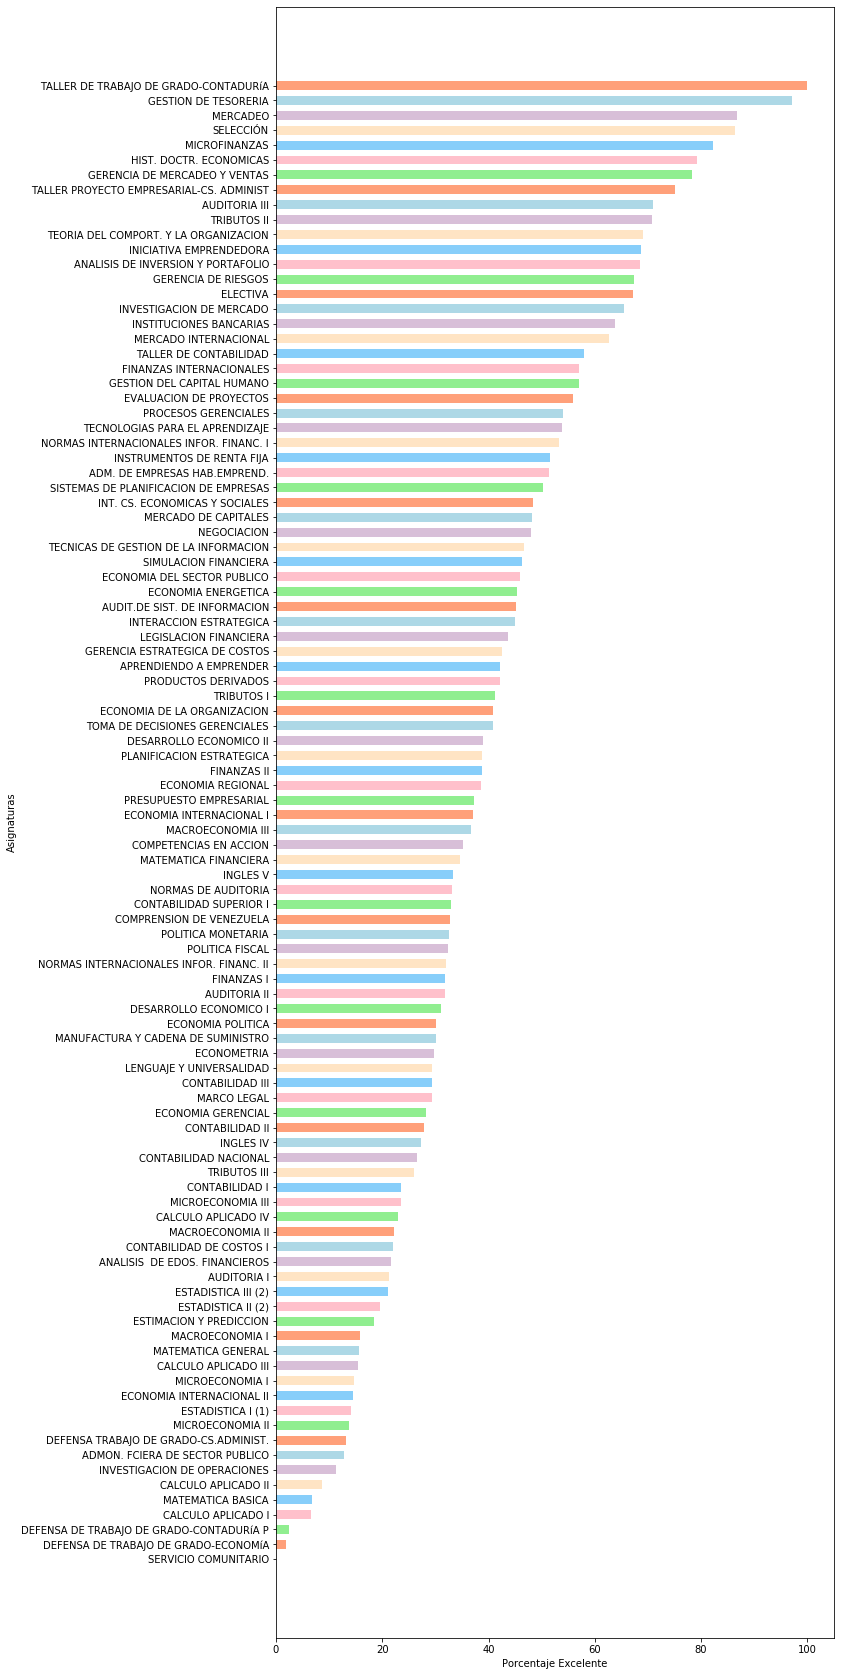

In [118]:
y = np.array([names[key] for key, value in excellent.items()])
x = np.array([value for key, value in excellent.items()])

fig, ax = plt.subplots(figsize=(10, 30))
ax.barh(y, x, height = 0.6, color=['lightblue', 'lightsalmon', 'lightgreen', 'pink', 'lightskyblue', 'bisque', 'thistle'])
ax.set_xlabel('Porcentaje Excelente')
ax.set_ylabel('Asignaturas')
plt.show()

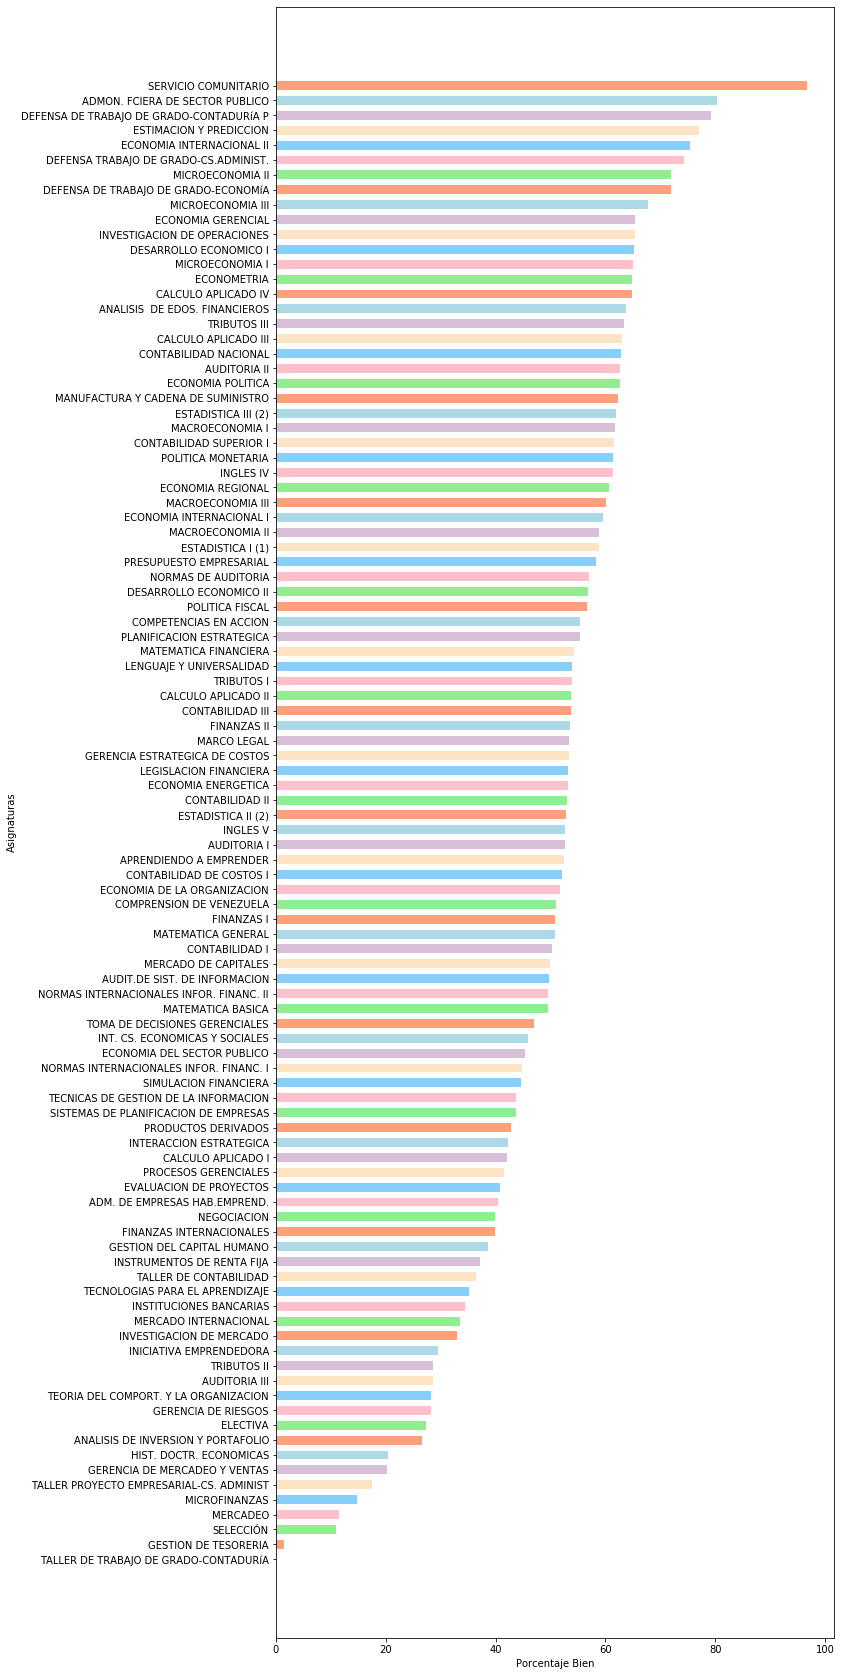

In [119]:
y = np.array([names[key] for key, value in good.items()])
x = np.array([value for key, value in good.items()])

fig, ax = plt.subplots(figsize=(10, 30))
ax.barh(y, x, height = 0.6, color=['lightblue', 'lightsalmon', 'lightgreen', 'pink', 'lightskyblue', 'bisque', 'thistle'])
ax.set_xlabel('Porcentaje Bien')
ax.set_ylabel('Asignaturas')
plt.show()

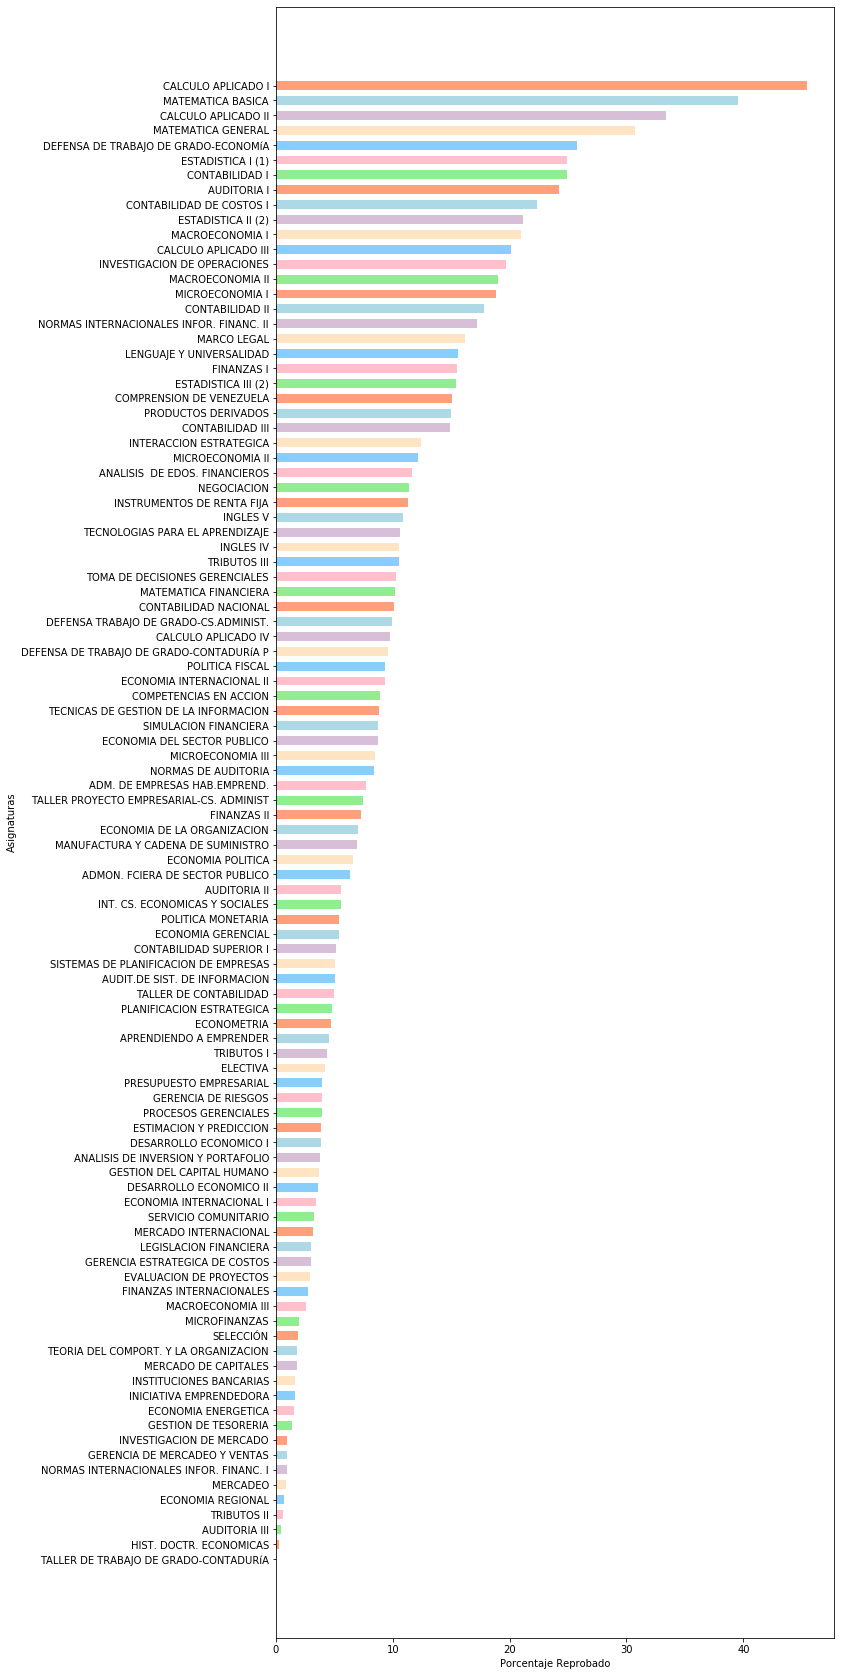

In [120]:
y = np.array([names[key] for key, value in failed.items()])
x = np.array([value for key, value in failed.items()])

fig, ax = plt.subplots(figsize=(10, 30))
ax.barh(y, x, height = 0.6, color=['lightblue', 'lightsalmon', 'lightgreen', 'pink', 'lightskyblue', 'bisque', 'thistle'])
ax.set_xlabel('Porcentaje Reprobado')
ax.set_ylabel('Asignaturas')
plt.show()

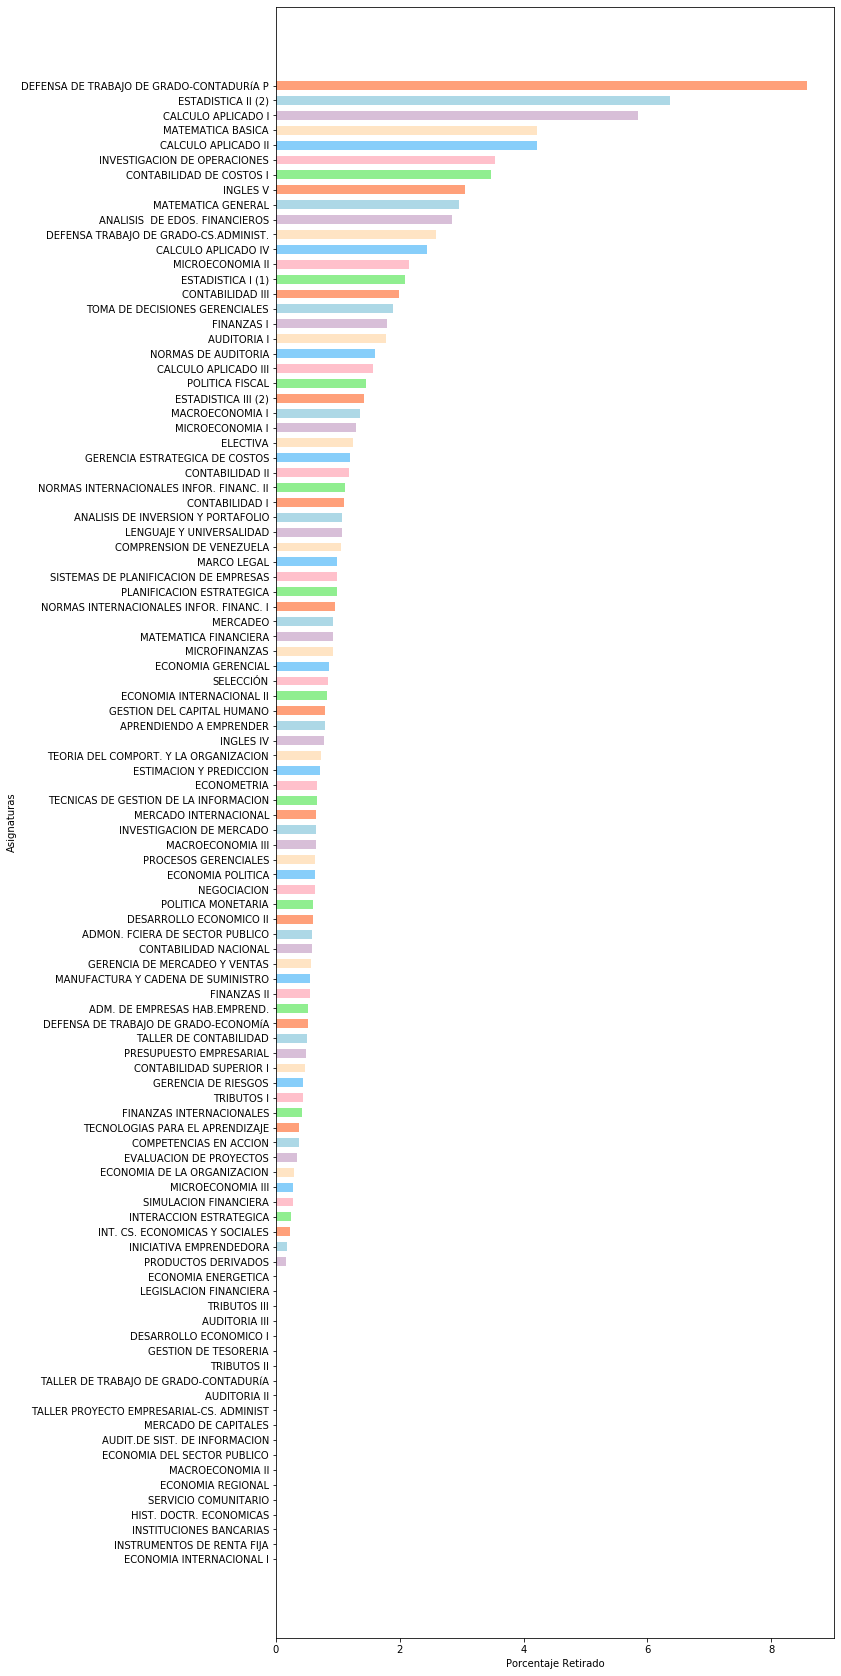

In [121]:
y = np.array([names[key] for key, value in withdraw.items()])
x = np.array([value for key, value in withdraw.items()])

fig, ax = plt.subplots(figsize=(10, 30))
ax.barh(y, x, height = 0.6, color=['lightblue', 'lightsalmon', 'lightgreen', 'pink', 'lightskyblue', 'bisque', 'thistle'])
ax.set_xlabel('Porcentaje Retirado')
ax.set_ylabel('Asignaturas')
plt.show()